In [1]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-11 08:09:26.483620: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 08:09:26.485477: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 08:09:26.597398: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 08:09:26.894412: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 08:09:28.387669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
rev_num = 11
print(f"Data of words indices in {rev_num} review with {len(train_data[rev_num])}:\n{train_data[rev_num]}")
print(f"This review is classified as: {train_labels[rev_num]}")

Data of words indices in 11 review with 99:
[1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 1398, 21, 54, 13, 219, 12, 13, 1706, 15, 4, 20, 16, 329, 6, 176, 329, 74, 51, 13, 873, 4, 156, 71, 78, 4, 7412, 322, 16, 31, 7, 4, 249, 4, 65, 16, 38, 379, 12, 100, 157, 18, 6, 910, 20, 549, 18, 4, 1496, 21, 14, 31, 9, 24, 6, 212, 12, 9, 6, 1322, 991, 7, 3002, 4, 425, 9, 73, 2218, 549, 18, 31, 155, 36, 100, 763, 379, 20, 103, 351, 5308, 13, 202, 12, 2241, 5, 6, 320, 46, 7, 457]
This review is classified as: 0


In [4]:
print(f"The words are in indices: 0 to {max([max(sequence) for sequence in train_data])}")

The words are in indices: 0 to 9999


indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(val, key) for (key, val) in word_index.items()]
)
decoded_review = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[rev_num]])
print(decoded_review)

? when i rented this movie i had very low expectations but when i saw it i realized that the movie was less a lot less than what i expected the actors were bad the doctor's wife was one of the worst the story was so stupid it could work for a disney movie except for the murders but this one is not a comedy it is a laughable masterpiece of stupidity the title is well chosen except for one thing they could add stupid movie after dead husbands i give it 0 and a half out of 5


## Multi-hot encoding for integer sequence

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(f"Create arrays of {x_train.shape} as and example:\n x_train is length of {len(x_train[rev_num])} and its first 100 datapoints:\n{x_train[rev_num][:100]}\n but it has  {np.count_nonzero(x_train[rev_num])} of ones")
        

Create arrays of (25000, 10000) as and example:
 x_train is length of 10000 and its first 100 datapoints:
[0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
 but it has  61 of ones


In [7]:
print(f"The review likely contains {np.sum(x_train[rev_num])} unique words out of the top 10,000 most frequent words, even though it comprises {len(train_data[rev_num])} words in total. Some words are repeated, and since the vectorization process only marks the presence of words")

The review likely contains 61.0 unique words out of the top 10,000 most frequent words, even though it comprises 99 words in total. Some words are repeated, and since the vectorization process only marks the presence of words


In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6829 - loss: 0.6014 - val_accuracy: 0.8654 - val_loss: 0.3943
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8940 - loss: 0.3391 - val_accuracy: 0.8781 - val_loss: 0.3213
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9224 - loss: 0.2461 - val_accuracy: 0.8875 - val_loss: 0.2870
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9422 - loss: 0.1894 - val_accuracy: 0.8737 - val_loss: 0.3106
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9517 - loss: 0.1613 - val_accuracy: 0.8736 - val_loss: 0.3150
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9582 - loss: 0.1395 - val_accuracy: 0.8810 - val_loss: 0.3075
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9659 - loss: 0.1177 - val_accuracy: 0.8814 - val_loss: 0.3116
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9692 - loss: 0.1047 - val_accuracy: 0.8823 - val_loss

In [14]:
history_dict = history.history
history_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

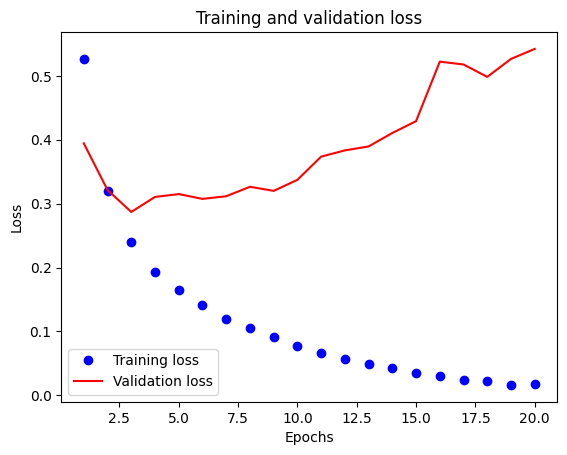

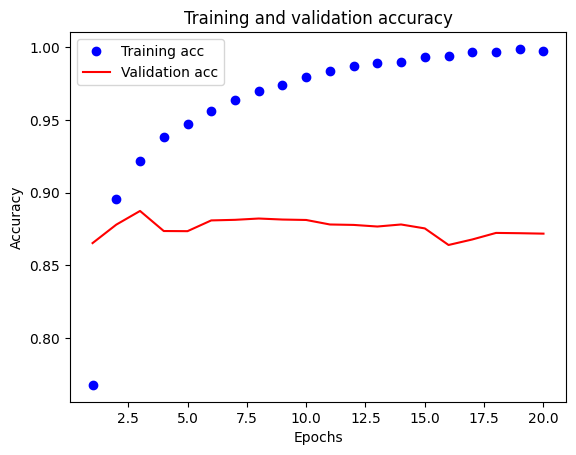

In [15]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "r", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()    
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## New model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7334 - loss: 0.5646
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9034 - loss: 0.2904
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.2149
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9396 - loss: 0.1771
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8821 - loss: 0.2903


In [17]:
print(f"Test loss: {results[0]}")
print(f"Test accuracy: {results[1]}")

Test loss: 0.2875840961933136
Test accuracy: 0.8850799798965454


In [18]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


array([[0.20576294],
       [0.9994383 ],
       [0.90603113],
       ...,
       [0.07754145],
       [0.06204908],
       [0.58252156]], dtype=float32)